# Predict Credit Score 
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

download the dataset in https://www.kaggle.com/c/GiveMeSomeCredit

This Project include Resampling, Hyperparameter Tuning & Model Selection

## Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

## Load Dataset & Inspection

In [2]:
training_data = pd.read_csv("./Machine Learning//dataset/GiveMeSomeCredit/cs-training.csv")
test_data = pd.read_csv("./Machine Learning//dataset/GiveMeSomeCredit/cs-test.csv")

### Read the Metadata
For deeper understanding of the dataset

In [3]:
pd.read_excel("./Machine Learning//dataset/GiveMeSomeCredit/Data Dictionary.xls")

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


**Training Data**

In [4]:
training_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [6]:
training_data.shape

(150000, 12)

In [7]:
training_data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

**Test Data**

In [8]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


In [10]:
test_data.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

### Removing a useless column from training data and target column from test data
Removing "Unnamed : 0" column from the training data
Removing "Unnamed : 0" and "SeriousDlqin2yrs" column from the training data

In [11]:
training_data = training_data.iloc[:,1:]

test_data = test_data.iloc[:,2:]

### Checking '0' values and distribution from each features

Fill tha '0' values with median and see the distribution from each features

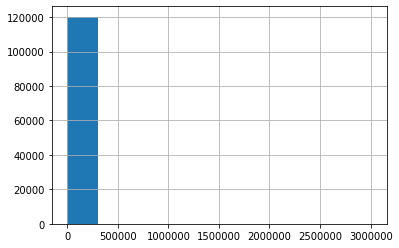

In [12]:
training_data['MonthlyIncome'].hist()

In [13]:
training_data[training_data['MonthlyIncome'] == 0.0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
298,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
537,0,0.086635,40,0,887.0,0.0,8,0,1,0,1.0
605,0,0.155742,39,0,723.0,0.0,13,0,0,0,2.0
629,0,1.000000,40,0,2866.0,0.0,2,0,2,0,0.0


In [14]:
training_data['MonthlyIncome'] = training_data['MonthlyIncome'].fillna(training_data['MonthlyIncome'].median(skipna=True))

In [15]:
training_data['NumberOfDependents'].median()

0.0

In [16]:
training_data['NumberOfDependents'] = training_data['NumberOfDependents'].astype('object')

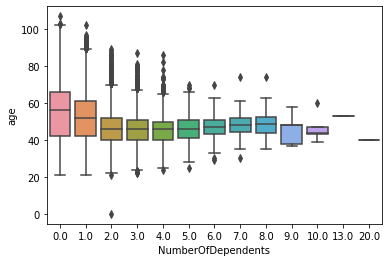

In [17]:
sns.boxplot(x='NumberOfDependents', y='age', data=training_data);

In [18]:
training_data['NumberOfDependents'] = training_data['NumberOfDependents'].fillna(0)

In [19]:
training_data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

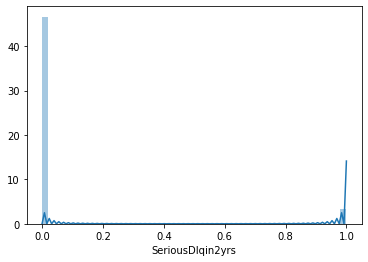

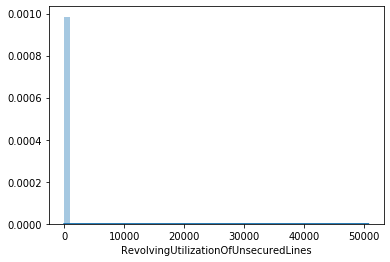

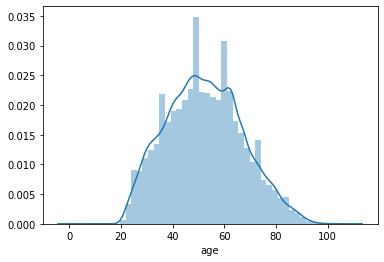

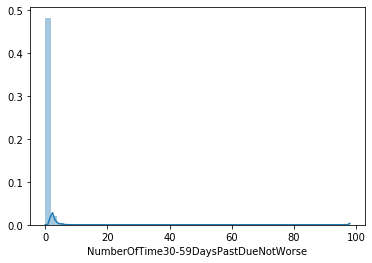

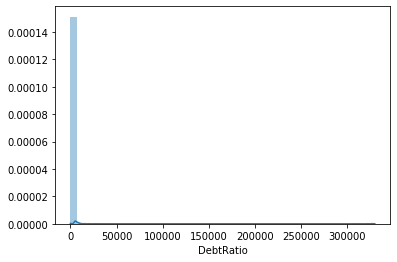

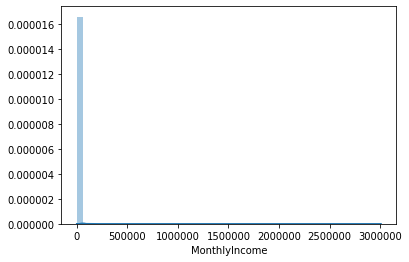

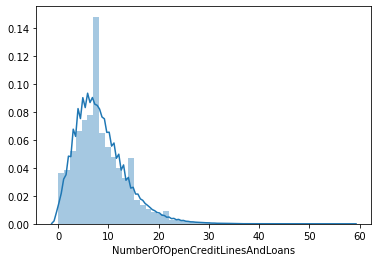

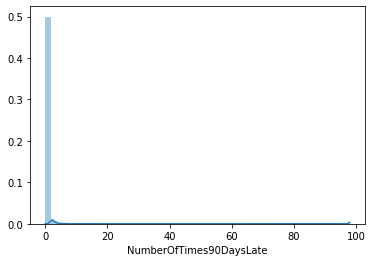

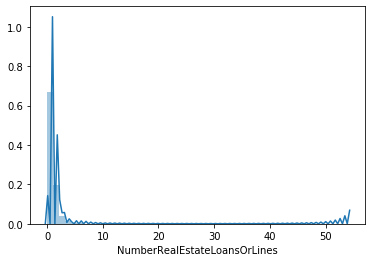

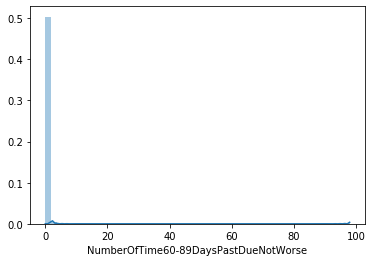

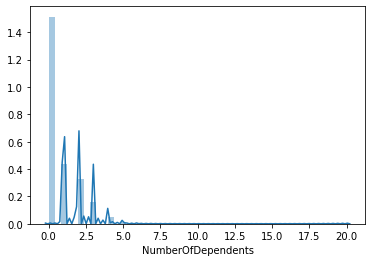

<Figure size 432x288 with 0 Axes>

In [22]:
for kolom in training_data.columns:
    sns.distplot(training_data[kolom])
    plt.figure()

In [23]:
training_data.skew().abs()

SeriousDlqin2yrs                          3.468857
RevolvingUtilizationOfUnsecuredLines     97.631574
age                                       0.188995
NumberOfTime30-59DaysPastDueNotWorse     22.597108
DebtRatio                                95.157793
MonthlyIncome                           127.121696
NumberOfOpenCreditLinesAndLoans           1.215314
NumberOfTimes90DaysLate                  23.087345
NumberRealEstateLoansOrLines              3.482484
NumberOfTime60-89DaysPastDueNotWorse     23.331743
NumberOfDependents                        1.626059
dtype: float64

### Normalized the dataset using log transform
for more info : https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [24]:
# make a copied data from training data
copied_data = training_data.copy()

# check skewness
data_after_log = np.log(copied_data + 1).skew().abs()

# see the data after log transform
data_after_log

SeriousDlqin2yrs                         3.468857
RevolvingUtilizationOfUnsecuredLines    11.704798
age                                      0.453014
NumberOfTime30-59DaysPastDueNotWorse     4.272123
DebtRatio                                1.749013
MonthlyIncome                            4.937610
NumberOfOpenCreditLinesAndLoans          0.733081
NumberOfTimes90DaysLate                  8.810639
NumberRealEstateLoansOrLines             0.238833
NumberOfTime60-89DaysPastDueNotWorse    10.605853
NumberOfDependents                       0.876485
dtype: float64

In [25]:
# take the index to make a table after this
indeks = np.log(copied_data +1).skew().abs().index

# make a variable from training that not transformed yet
data_before_log = training_data.skew().abs()

# make a dataframe
pembanding = pd.DataFrame({
    "after_log": data_after_log,
    "before_log": data_before_log
}).set_index(indeks)

pembanding

,after_log,before_log
SeriousDlqin2yrs,3.468857,3.468857
RevolvingUtilizationOfUnsecuredLines,11.704798,97.631574
age,0.453014,0.188995
NumberOfTime30-59DaysPastDueNotWorse,4.272123,22.597108
DebtRatio,1.749013,95.157793
MonthlyIncome,4.937610,127.121696
NumberOfOpenCreditLinesAndLoans,0.733081,1.215314
NumberOfTimes90DaysLate,8.810639,23.087345
NumberRealEstateLoansOrLines,0.238833,3.482484
NumberOfTime60-89DaysPastDueNotWorse,10.605853,23.331743


In [26]:
# make a list varible that contains the name of the column
kolom_transformasi = []

# transform the column if before_log < after_log from "pembanding" variable
for variabel, nilai in zip(indeks, pembanding.values):

    if nilai[0]<nilai[1]:
        print("Transformasi", variabel)
        
        kolom_transformasi.append(variabel)
    else:
        print("Jangan Transformasi", variabel)

Jangan Transformasi SeriousDlqin2yrs
Transformasi RevolvingUtilizationOfUnsecuredLines
Jangan Transformasi age
Transformasi NumberOfTime30-59DaysPastDueNotWorse
Transformasi DebtRatio
Transformasi MonthlyIncome
Transformasi NumberOfOpenCreditLinesAndLoans
Transformasi NumberOfTimes90DaysLate
Transformasi NumberRealEstateLoansOrLines
Transformasi NumberOfTime60-89DaysPastDueNotWorse
Transformasi NumberOfDependents


#### Transform the feature from training data and test data

In [27]:
for kolom in kolom_transformasi:
    training_data[kolom] = np.log(training_data[kolom] + 1)

In [28]:
for kolom in kolom_transformasi:
    test_data[kolom] = np.log(test_data[kolom] + 1)

## Resampling & Cross-Validation

It’s easy to train a model against a particular dataset, but how does this model perform when introduced with new data? How do you know which machine learning model to use? Cross-validation answers these questions by assuring a model is producing accurate results and comparing those results against other models. Cross-validation goes beyond regular validation, the process of analyzing how a model does on its own training data, by evaluating how a model does on new data.

Several different methods of cross-validation are discussed in the following sections:

- Hold-out Validation
- K-Fold Cross-Validation
- Leave-One-Out Validation

for more info : https://machine-learning-course.readthedocs.io/en/latest/content/overview/crossvalidation.html

### Hold-Out

The holdout cross-validation method involves removing a certain portion of the training data and using it as test data. The model is first trained against the training set, then asked to predict output from the testing set. This is the simplest form of cross-validation techniques, and is useful if you have a large amount of data or need to implement validation quickly and easily.

![Hold-Out](./images/holdout.png)

Image source: https://machine-learning-course.readthedocs.io/en/latest/content/overview/crossvalidation.html

In here, train data = 0.8 of the dataset
and test data (data validation) = 0.2 of the dataset

In [29]:
data_train = training_data.groupby("SeriousDlqin2yrs", group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=1000))

data_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
96384,0,0.239094,68,0.693147,7.716461,8.594339,2.639057,0.000000,1.098612,0.000000,0.000000
16538,0,0.093494,58,0.693147,0.236960,8.455531,1.945910,0.000000,0.693147,0.000000,0.000000
14062,0,0.250710,63,0.000000,0.201708,9.235131,2.079442,0.000000,1.098612,0.000000,0.000000
125815,0,0.311361,51,0.000000,5.393628,8.594339,0.693147,0.000000,0.000000,0.000000,0.000000
101835,0,0.428015,47,0.000000,0.500576,8.787373,2.302585,0.000000,1.386294,0.000000,1.098612
16030,0,0.000000,42,0.000000,0.296061,9.175335,1.609438,0.000000,1.098612,0.000000,0.000000
114711,0,0.503769,40,0.000000,7.131299,0.693147,1.791759,0.000000,1.098612,0.000000,1.386294
47723,0,0.269563,55,0.000000,0.185277,9.080687,2.708050,0.000000,0.693147,0.000000,0.000000
42726,0,0.016196,56,0.000000,0.186719,8.689128,1.386294,0.000000,0.693147,0.000000,0.000000
39880,0,0.035278,42,0.000000,0.773036,7.824446,1.945910,0.000000,1.098612,0.000000,1.098612


In [30]:
data_validasi = training_data.drop(data_train.index)

data_validasi

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
12,0,0.010299,46,0.000000,0.261097,9.429877,2.639057,0.000000,1.098612,0.000000,1.098612
18,0,0.200336,43,0.000000,0.423886,8.095904,2.079442,0.000000,0.693147,0.000000,1.098612
19,0,0.471749,25,0.000000,0.063790,5.811141,1.098612,0.000000,0.000000,0.000000,0.000000
21,1,0.025332,38,0.000000,0.389228,8.006701,2.079442,0.000000,0.693147,0.000000,1.098612
22,0,0.693147,39,0.000000,0.216001,7.824446,1.609438,0.000000,0.000000,0.000000,0.000000
27,0,0.033842,69,0.000000,0.041509,7.824446,2.890372,0.000000,0.000000,0.000000,0.693147
29,0,0.331456,58,1.098612,0.361933,8.612685,2.772589,0.000000,0.693147,0.000000,0.000000
36,0,0.632248,50,1.386294,0.449710,8.294300,2.302585,0.000000,0.693147,0.000000,0.693147
40,0,0.542316,41,0.693147,0.431493,8.648397,2.708050,0.000000,0.693147,0.000000,0.000000
48,0,0.606526,38,0.000000,0.331935,9.472782,2.639057,0.000000,1.098612,0.000000,1.098612


**Scikit-Learn train_test_split**

Basicly using Hold-Out method, but a different approach

In [31]:
training_data.iloc[:,1:].values

array([[ 0.56878879, 45.        ,  1.09861229, ...,  1.94591015,
         0.        ,  1.09861229],
       [ 0.67148985, 40.        ,  0.        , ...,  0.        ,
         0.        ,  0.69314718],
       [ 0.5057207 , 38.        ,  0.69314718, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.21997367, 58.        ,  0.        , ...,  0.69314718,
         0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61533857, 64.        ,  0.        , ...,  1.09861229,
         0.        ,  0.        ]])

In [32]:
nilai_X = training_data.iloc[:,1:].values
nilai_y = training_data['SeriousDlqin2yrs'].values

X_train, X_val, y_train, y_val = train_test_split(nilai_X, nilai_y, test_size=0.2, stratify=nilai_y)

In [33]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran X_val: ", X_val.shape)
print("Ukuran y_val: ", y_val.shape)

Ukuran X_train:  (120000, 10)
Ukuran y_train:  (120000,)
Ukuran X_val:  (30000, 10)
Ukuran y_val:  (30000,)


### K-Fold

K-Fold Cross Validation helps remove these biases from your model by repeating the holdout method on k subsets of your dataset. With K-Fold Cross Validation, a dataset is broken up into several unique folds of test and training data. The holdout method is performed using each combination of data, and the results are averaged to find a total error estimation.

![Kfold](./images/kfold.png)

A “fold” here is a unique section of test data. For instance, if you have 100 data points and use 10 folds, each fold contains 10 test points. K-Fold Cross Validation is important because it allows you to use your complete dataset for both training and testing. It’s especially useful when evaluating a model using small or limited datasets.

Image source : https://machine-learning-course.readthedocs.io/en/latest/content/overview/crossvalidation.html#holdout-method

In [34]:
folding = StratifiedKFold(n_splits=10)

folding.get_n_splits(nilai_X, nilai_y)

10

In [35]:
for training_index, test_index in folding.split(nilai_X, nilai_y):
    print("Index X: ", training_index, " dan Index y: ", test_index)

Index X:  [ 14969  14970  14971 ... 149997 149998 149999]  dan Index y:  [    0     1     2 ... 15629 15662 15667]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [14969 14970 14971 ... 30887 30945 30986]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [29933 29934 29935 ... 45001 45002 45003]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [44997 45004 45005 ... 60047 60053 60075]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [59998 59999 60000 ... 75273 75291 75293]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [74984 74985 74986 ... 90962 91011 91036]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [ 89947  89948  89950 ... 105189 105218 105221]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index y:  [104988 104990 104991 ... 120572 120576 120577]
Index X:  [     0      1      2 ... 149997 149998 149999]  dan Index

### Leave-One-Out

In LOOCV we divide the data set into two parts. In one part we have a single observation, which is our test data and in the other part, we have all the other observations from the dataset forming our training data.
If we have a data set with n observations then training data contains n-1 observation and test data contains 1 observation.
This process is iterated for each data point as shown below. Repeating this process n times generates n times Mean Square Error(MSE).

![Leave-One-Out](./images/lou.png)

Image source: https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e

In [36]:
buang_atu = LeaveOneOut()

buang_atu.get_n_splits(nilai_X)

150000

**It takes a really long time for 150000 dataset**
So, I'm not doing it. But if You have to, just uncomment the code below

In [37]:
#for training_index, test_index in buang_atu.split(nilai_X):
 #   print("Fold ke")
  #  print("Ukuran X: ", training_index.shape, " dan ukuran y: ", test_index.shape)
   # print("")

## Hyperparameter Tuning

When a model is being trained on a data set, it determines the best parameters for each predictor variable. This can be seen in a linear regression, where the coefficients are determined for each variable used in the model. The coefficients in this case are the parameters: they are found via the training process. Hyperparameters on the other hand are parameters that are independent of the training process — the data scientist sets them beforehand. For example, in random forest, a hyperparameter would be how many trees to include or how many nodes each tree can have. Parameters would be the criteria for each node, which the training process for the random forest finds. In short:
- Parameters are found by training the model
- Hyperparameters are set by the data scientist before training


I consider 3 main aspects to making a good model. One is what type of model to use — will it be a liner regression, a SVM, or a random forest? The second one is what independent variables to include in that model (a.k.a feature selection). After these tasks are complete the third aspect to consider is hyperparameter tuning, which is finding the best hyperparameters to use. This is why you should care about hyperparameter tuning: it has the ability to drastically improve the accuracy of your model, just like model selection or feature selection.

- Grid Search Method

generates evenly spaced values for each hyperparameter being tested, and then uses cross validation to test the accuracy of each combination
- Random Search Method

generates random values for each hyperparameter being tested, and then uses cross validation to test the accuracy of each combination.



**Grid Initiation**

In [38]:

n_estimators = [10, 20]

max_features = ['auto', 'sqrt']

max_depth = [5, 6, 7, 8]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]


inisiasi_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

inisiasi_grid

{'n_estimators': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

### Random Search

**RandomForest Model Initiation**

In [39]:
model_random_forest = RandomForestClassifier()

In [40]:

model_random_cv = RandomizedSearchCV(estimator=model_random_forest, 
                                     param_distributions=inisiasi_grid,
                                     n_iter=2,
                                     cv=folding,
                                    random_state=1000,
                                    n_jobs=3)

# model fitting
model_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weig...
                                                    random_state=None,
   

**Checking Best Estimator**

In [41]:
model_random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predict**

In [42]:
hasil_prediksi = model_random_cv.predict(X_val)

hasil_prediksi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_val, hasil_prediksi)

0.937

**Changing predict to probability**

In [44]:
hasil_prediksi = model_random_cv.predict_proba(X_val)

In [45]:
pd.DataFrame(hasil_prediksi, columns=['Probabilitas P(0)', 'Probabilitas P(1)'])

,Probabilitas P(0),Probabilitas P(1)
0,0.981572,0.018428
1,0.866575,0.133425
2,0.976430,0.023570
3,0.939315,0.060685
4,0.756442,0.243558
5,0.974011,0.025989
6,0.978685,0.021315
7,0.987857,0.012143
8,0.786750,0.213250
9,0.989371,0.010629


## Grid Search

Grid search will search for optimum parameter in a really greedy way. Will concume a lot of time and resource. So, I'm not doing it.

In [ ]:
#model_grid_cv = GridSearchCV(estimator=model_random_forest, 
 #                                param_grid=inisiasi_grid, 
  #                               cv=folding, 
   #                              n_jobs=3)

#model_grid_cv.fit(X_train, y_train)

## Kaggle Submission

**Data Imputation**

In [46]:
# imputasi MonthlyIncome dengan nilai median MonthlyIncome pada data training
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(training_data['MonthlyIncome'].median(skipna=True))

# Imputasi NumberOfDependents dengan nilai 0
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(0)

**Convert ```test_data``` to matrix**

In [47]:
X_test = test_data.values

**predicting using ```.predict_proba```**

In [48]:
hasil_prediksi = model_random_cv.predict_proba(X_test)

**Save to file CSV**

In [49]:
pd.DataFrame({
    "Id": range(1,len(hasil_prediksi[:,1]) + 1),
    "Probability": hasil_prediksi[:,1]
}).to_csv("gimana.csv", index=False)

<img src="Untitled1.png">

**Using Naive Bayes**

In [50]:
# load modul GaussianNB
from sklearn.naive_bayes import ComplementNB

# inisiasi model
model_nb_complement = ComplementNB(fit_prior=False)

# fitting model
model_nb_complement.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_nb_complement.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
# menentukan jumlah estimator
n_estimators = [10, 20]
# Menentukan jumlah feature yang digunakan dalam tiap split
max_features = ['auto', 'sqrt']
# Menentukan tingkat kedalaman pohon keputusan
max_depth = [5, 6, 7, 8]
# Menentukan jumlah minimum sampel untuk melakukan split pada node
min_samples_split = [2, 5, 10]
# Menentukan jumlah sampel minimum untuk melakukan split pada leaf
min_samples_leaf = [1, 2, 4]
# Metode penentuan sampling
bootstrap = [True, False]

alpha=[0,1]
norm=[True, False]

# inisiasi grid
inisiasi_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

inisiasi_grid_nb={'alpha':alpha, 'norm':norm}
inisiasi_grid_nb

{'alpha': [0, 1], 'norm': [True, False]}

In [56]:
model_nb_complement.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior', 'norm'])

In [58]:
# inisisasi RandomizedSearchCV
model_random_cv = RandomizedSearchCV(estimator=model_nb_complement, 
                                     param_distributions=inisiasi_grid_nb,
                                     n_iter=2,
                                     cv=folding,
                                    random_state=1000,
                                    n_jobs=3)

# model fitting
model_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=ComplementNB(alpha=1.0, class_prior=None,
                                          fit_prior=False, norm=False),
                   iid='warn', n_iter=2, n_jobs=3,
                   param_distributions={'alpha': [0, 1], 'norm': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=1000, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [59]:
hasil_prediksi = model_random_cv.predict(X_val)

hasil_prediksi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
accuracy_score(y_val, hasil_prediksi)

0.9335333333333333

In [61]:
hasil_prediksi = model_random_cv.predict_proba(X_val)

In [62]:
pd.DataFrame(hasil_prediksi, columns=['Probabilitas P(0)', 'Probabilitas P(1)'])

,Probabilitas P(0),Probabilitas P(1)
0,0.558120,0.441880
1,0.550809,0.449191
2,0.573805,0.426195
3,0.552165,0.447835
4,0.551924,0.448076
5,0.532383,0.467617
6,0.550315,0.449685
7,0.559762,0.440238
8,0.573945,0.426055
9,0.563776,0.436224


In [63]:
X_test = test_data.values
hasil_prediksi = model_random_cv.predict_proba(X_test)

In [64]:
pd.DataFrame({
    "Id": range(1,len(hasil_prediksi[:,1]) + 1),
    "Probability": hasil_prediksi[:,1]
}).to_csv("gimana1.csv", index=False)

<img src="UntitledNB.png">

**Still, the best**
<img src="Untitled1.png">

**Using GRADIENT BOOST TREE**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()

model_gradient_boosting.fit(X_train, y_train)

hasil_prediksi = model_gradient_boosting.predict(X_test)

hasil_prediksi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
model_gradient_boosting.get_params().keys()

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [71]:
# menentukan jumlah estimator
n_estimators = [100]
# Menentukan jumlah feature yang digunakan dalam tiap split
max_features = ['auto', 'sqrt', 'log2']
# Menentukan tingkat kedalaman pohon keputusan
max_depth = [5, 6, 7, 8]
# Menentukan jumlah minimum sampel untuk melakukan split pada node
min_samples_split = [2, 5, 10]
# Menentukan jumlah sampel minimum untuk melakukan split pada leaf
min_samples_leaf = [1, 2, 4]
# Metode penentuan sampling
bootstrap = [True, False]

loss = ['deviance', 'exponential']

alpha=[0,1]
norm=[True, False]

# inisiasi grid
inisiasi_grid_gb = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                   'loss':loss}

inisiasi_grid_gb

{'n_estimators': [100],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 6, 7, 8],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'loss': ['deviance', 'exponential']}

In [72]:
# inisisasi RandomizedSearchCV
model_random_cv = RandomizedSearchCV(estimator=model_gradient_boosting, 
                                     param_distributions=inisiasi_grid_gb,
                                     n_iter=2,
                                     cv=folding,
                                    random_state=1000,
                                    n_jobs=3)

# model fitting
model_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_sample...
                                  

In [73]:
hasil_prediksi = model_random_cv.predict(X_val)

hasil_prediksi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
accuracy_score(y_val, hasil_prediksi)

0.9367666666666666

In [75]:
hasil_prediksi = model_random_cv.predict_proba(X_val)

In [76]:
pd.DataFrame(hasil_prediksi, columns=['Probabilitas P(0)', 'Probabilitas P(1)'])

,Probabilitas P(0),Probabilitas P(1)
0,0.991693,0.008307
1,0.860067,0.139933
2,0.996953,0.003047
3,0.936186,0.063814
4,0.659274,0.340726
5,0.971948,0.028052
6,0.988969,0.011031
7,0.979267,0.020733
8,0.790526,0.209474
9,0.997245,0.002755


In [77]:
X_test = test_data.values
hasil_prediksi = model_random_cv.predict_proba(X_test)

In [78]:
pd.DataFrame({
    "Id": range(1,len(hasil_prediksi[:,1]) + 1),
    "Probability": hasil_prediksi[:,1]
}).to_csv("gimana2.csv", index=False)

**The Best for Now**
<img src="UntitledGB.png">